In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [5]:
coca = pd.read_excel("Cocacola_Sales_Rawdata.xlsx")
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [7]:
coca.shape

(42, 2)

In [8]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [10]:
coca_vis = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=None,squeeze=True)
coca_vis.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

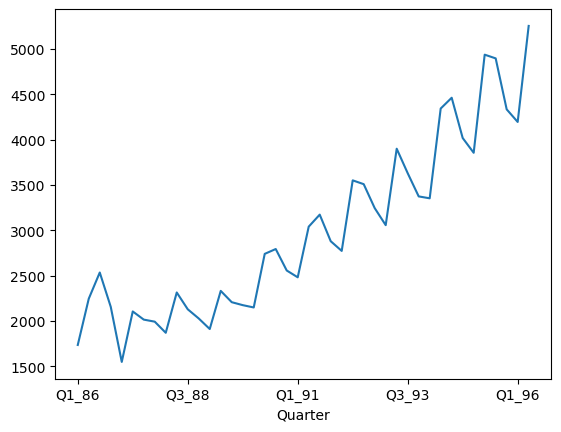

In [11]:
coca_vis.plot()

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

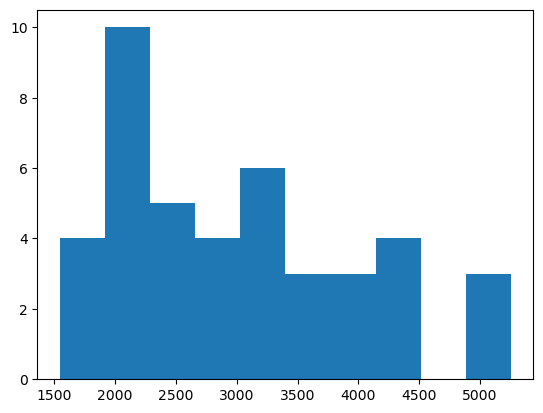

In [12]:
plt.hist(coca_vis)

<AxesSubplot:ylabel='Density'>

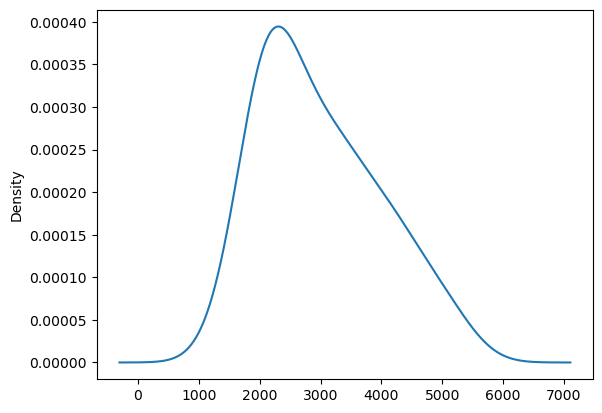

In [14]:
coca_vis.plot(kind = "kde")

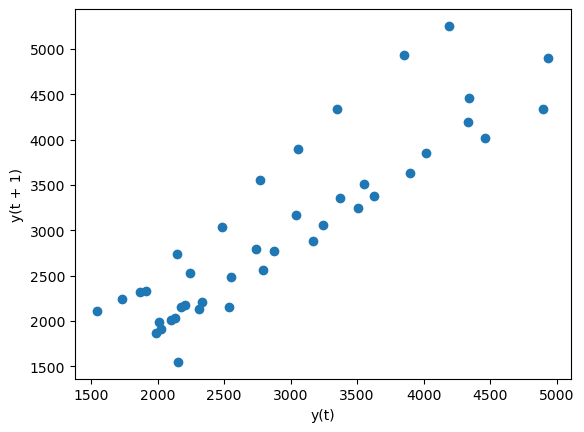

In [16]:
lag_plot(coca_vis);

In [17]:
coca['Quarters'] = 0
coca['Year'] = 0
for i in range(42):
    p = coca["Quarter"][i]
    coca['Quarters'][i]=p[0:2]
    coca['Year'][i]= p[3:5]
coca.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [19]:
q_dumies = pd.DataFrame(pd.get_dummies(coca.Quarters))
q_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [21]:
coca = pd.concat([coca, q_dumies], axis = 1)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [22]:
coca['t']=range(1,43)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


In [25]:
coca["t_squared"] = coca.t*coca.t
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


In [26]:
coca['log_Sales'] = np.log(coca.Sales)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

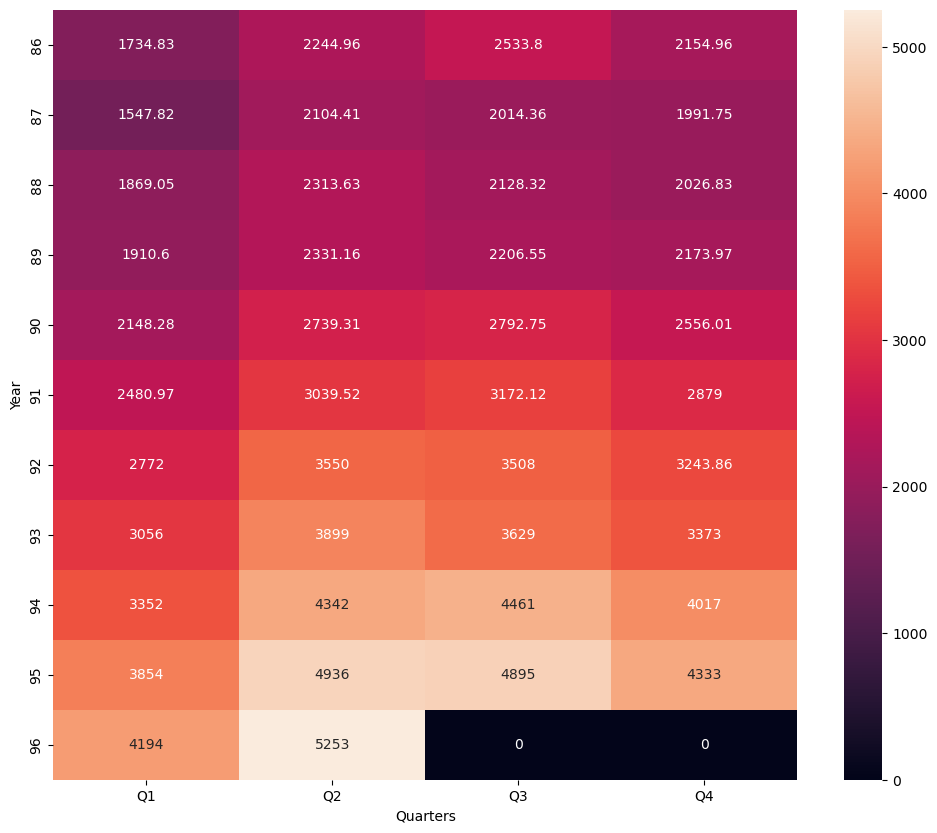

In [28]:
plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = coca, values="Sales", index = "Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y, annot=True, fmt = "g")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

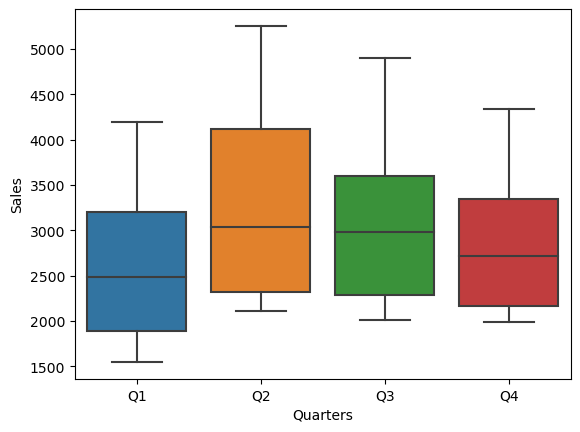

In [29]:
sns.boxplot(x='Quarters',y='Sales',data=coca)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

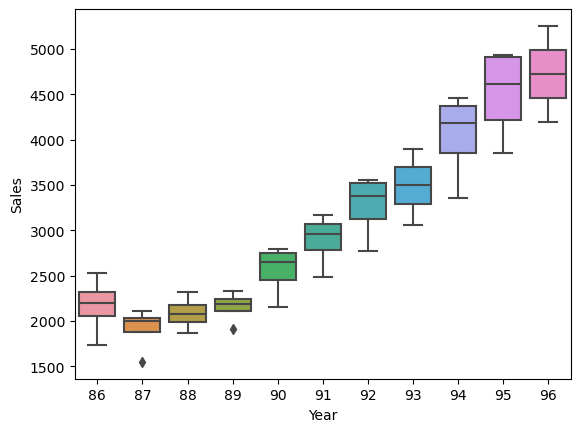

In [30]:
sns.boxplot(x='Year',y='Sales',data=coca)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

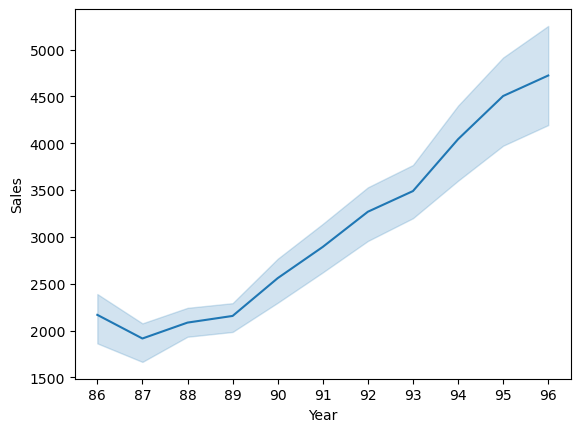

In [31]:
sns.lineplot(x = "Year",y = 'Sales',data = coca)

In [35]:
train = coca.head(33)
test = coca.tail(9)

In [36]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
pred_linear

33    3542.479039
34    3598.493244
35    3654.507450
36    3710.521656
37    3766.535861
38    3822.550067
39    3878.564273
40    3934.578478
41    3990.592684
dtype: float64

In [37]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

811.0635934509912

In [38]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
pred_exp

33    8.196537
34    8.217988
35    8.239439
36    8.260891
37    8.282342
38    8.303793
39    8.325245
40    8.346696
41    8.368147
dtype: float64

In [39]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

646.8116922622231

In [40]:
quad_model = smf.ols("Sales~t+t_squared",data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
pred_quad

33    3878.455407
34    3993.759560
35    4112.451709
36    4234.531856
37    4360.000000
38    4488.856141
39    4621.100279
40    4756.732414
41    4895.752545
dtype: float64

In [41]:
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

423.1005737527234

In [42]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea

33    2777.750122
34    2748.113498
35    2549.922247
36    2319.061332
37    2777.750122
38    2748.113498
39    2549.922247
40    2319.061332
41    2777.750122
dtype: float64

In [43]:
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1884.9697647455082

In [44]:
add_sea_Quad_model = smf.ols('Sales ~ t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
pred_add_sea_quad

33    4204.963028
34    4246.358030
35    4119.198405
36    4036.393498
37    4732.585528
38    4789.765335
39    4678.390516
40    4611.370415
41    5323.347251
dtype: float64

In [45]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.94379798402434

In [46]:
mul_add_sea = smf.ols('log_Sales ~ t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
pred_mult_add_sea

33    8.298049
34    8.287704
35    8.215960
36    8.152407
37    8.385198
38    8.374853
39    8.303109
40    8.239556
41    8.472347
dtype: float64

In [47]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

432.64468120801723

In [48]:
mul_sea_model = smf.ols('log_Sales ~ Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
pred_mult_sea

33    7.905878
34    7.895533
35    7.823789
36    7.716661
37    7.905878
38    7.895533
39    7.823789
40    7.716661
41    7.905878
dtype: float64

In [49]:
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1947.379419319009

In [50]:
data = {"MODEL":pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,225.943798
2,rmse_Quad,423.100574
6,rmse_Mult_add_sea,432.644681
1,rmse_Exp,646.811692
0,rmse_linear,811.063593
3,rmse_add_sea,1884.969765
5,rmse_Mult_sea,1947.379419
